In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math, os, sys, datetime
from simulator import Simulator
#from utils.batch_manager import fit_into_batch, extract_from_batch
#from utils.preprocessstock import preprocess

C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\keypg\Anaconda3\envs\ml\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

In [3]:
# USER INPUT SECTION #
DATA_CSV_PATH = os.path.abspath('dataset/MSFT-20.csv')
MODEL_TYPE = 'tdnn_pso' # tdnn, tdnn_pso, tdnn_de, svm, rf
BALANCE = 1000000
BUY_LIMIT_FROM_BALANCE_PORTION = 1/3
TRADE_BASE_FEE = 0
TRADE_FEE = .15
VAT = 7
CUT_LOSS = 2
UNIT_MULTIPLIER = 100
EMA_ALPHA = .25
ADAPTIVE_EMA_ALPHA = True
TRADE_SENSITIVITY = .40
TRADE_FREQUENCY = 1
#CURRENT_UNIT = 0
#MAX_UNIT_BUY_PER_TRADE = 10 # total number of trading unit come from MAX_UNIT_BUY_PER_TRADE * UNIT_MULTIPLIER
#MAX_UNIT_SELL_PER_TRADE = 10 # total number of trading unit come from MAX_UNIT_SELL_PER_TRADE * UNIT_MULTIPLIER

In [4]:
simulator = Simulator(csv_file_path=DATA_CSV_PATH,
                     model_type=MODEL_TYPE,
                     balance=BALANCE,
                     buy_limit_from_balance_portion=BUY_LIMIT_FROM_BALANCE_PORTION,
                     trade_base_fee=TRADE_BASE_FEE,
                     trade_fee=TRADE_FEE,
                     vat=VAT,
                     cut_loss=CUT_LOSS,
                     unit_multiplier=UNIT_MULTIPLIER,
                     trade_sensitivity=TRADE_SENSITIVITY,
                     ema_alpha=EMA_ALPHA,
                     adaptive_ema_alpha=ADAPTIVE_EMA_ALPHA,
                     trade_freq=TRADE_FREQUENCY)

In [5]:
r_balance, r_real_hist_price, r_y, r_pred, r_pred_hma, r_obv, r_obv_hma, r_trade_record, r_brought_units = simulator.run()

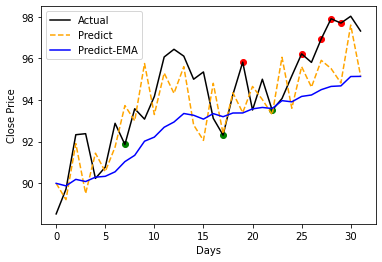

In [6]:
%matplotlib inline
simulator.plot(save=False, plot_buy_sell_point=True, in_range=[0,32])

In [9]:
r_balance/BALANCE

1.6516079605181275